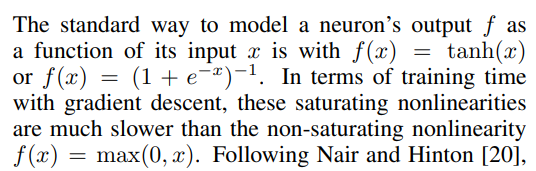

- $f(x) = max(0,x)$ is better than others.

In [ ]:
"""
I solved XOR problem using tanh, sigmoid, relu respectly. Sigmoid was the worst thing, but tanh was good as relu.
Both tanh and XOR have a symmetrical property, which is thought to be why the result showed such like that.
Tanh can express negative values that is advantageous at symmetrical problems, unlike sigmoid.
Maybe relu will be much better at other complex problems.
"""
import torch
import torch.nn as nn

model1 = nn.Sequential(
    nn.Linear(2, 4),
    nn.Tanh(),
    nn.Linear(4, 1),
)

model2 = nn.Sequential(
    nn.Linear(2, 4),
    nn.Sigmoid(),
    nn.Linear(4, 1),
)

model3 = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
)

x = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]], requires_grad=True)
y_true = torch.tensor([[0.0], [1.0], [1.0], [0.0]])

optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.01)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.01)
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.01)

for epoch in range(301):

    y_pred1 = model1(x)
    loss1 = nn.MSELoss()(y_pred1, y_true)
    optimizer1.zero_grad()
    loss1.backward()
    optimizer1.step()

    y_pred2 = model2(x)
    loss2 = nn.MSELoss()(y_pred2, y_true)
    optimizer2.zero_grad()
    loss2.backward()
    optimizer2.step()

    y_pred3 = model3(x)
    loss3 = nn.MSELoss()(y_pred3, y_true)
    optimizer3.zero_grad()
    loss3.backward()
    optimizer3.step()

    if epoch % 300 == 0:
        print(f'Epoch [{epoch}/300], Loss: {loss1.item()}')
        print(f'  Predicted y: {y_pred1}')
        print(f'Epoch [{epoch}/300], Loss: {loss2.item()}')
        print(f'  Predicted y: {y_pred2}')
        print(f'Epoch [{epoch}/300], Loss: {loss3.item()}')
        print(f'  Predicted y: {y_pred3}')

Epoch [0/300], Loss: 0.839573860168457
  Predicted y: tensor([[-0.4004],
        [-0.1282],
        [-0.3836],
        [-0.1042]], grad_fn=<AddmmBackward0>)
Epoch [0/300], Loss: 1.053152084350586
  Predicted y: tensor([[-0.3973],
        [-0.4369],
        [-0.3544],
        [-0.3945]], grad_fn=<AddmmBackward0>)
Epoch [0/300], Loss: 0.2808196544647217
  Predicted y: tensor([[0.6835],
        [0.5833],
        [0.7994],
        [0.6650]], grad_fn=<AddmmBackward0>)
Epoch [300/300], Loss: 0.002378886565566063
  Predicted y: tensor([[0.0376],
        [0.9642],
        [0.9575],
        [0.0708]], grad_fn=<AddmmBackward0>)
Epoch [300/300], Loss: 0.2449701726436615
  Predicted y: tensor([[0.4690],
        [0.5154],
        [0.5076],
        [0.5316]], grad_fn=<AddmmBackward0>)
Epoch [300/300], Loss: 1.127981111292975e-10
  Predicted y: tensor([[-2.0860e-05],
        [ 1.0000e+00],
        [ 1.0000e+00],
        [-2.1402e-06]], grad_fn=<AddmmBackward0>)


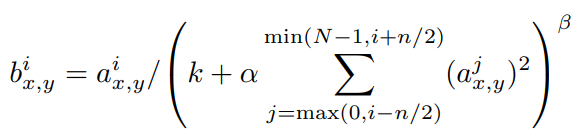

- $b_{x,y}^i$: $i$th channel (feature map) on position (x,y); output of normalization
- $a_{x,y}^i$: original input
- k: prevent to be 0
- $a_{x,y}^j$: peripheral channels of input channel; be normalized from peripheral
- α: scaling parameter of $(a_{x,y}^j)^2$
- β: exponent parameter that how much normalization affects
- N: the number of entire channels
- n: range of how many channels include
- max(0,i-n/2) and min(N-1,i+n/2) just prevent range exceeding the number of channel.

In [ ]:
a_i = torch.tensor([[1, 2, 5, 7]])
k = 1
alpha = 0.1
beta = 0.9

b = a_i / (2 + alpha)**beta       # without peripheral
print(a_i)
print(b)

sum_squared = torch.sum(a_i**2)
c = a_i / (2 + alpha * (sum_squared - a_i**2)) ** beta        # with periperal, excluding itself
print(c)        # with peripheral influence, numbers get smaller

tensor([[1, 2, 5, 7]])
tensor([[0.5129, 1.0257, 2.5643, 3.5901]])
tensor([[0.1282, 0.2637, 0.8254, 1.6445]])


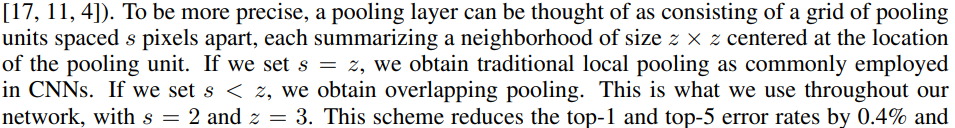

- s: length of stride
- z x z: size of summarizing
- This part shows overlapping pooling is better than just pooling, minimizing information loss.

In [ ]:
class Maxpooling(nn.Module):
    def __init__(self):
        super(Maxpooling, self).__init__()
        self.pool = nn.MaxPool2d(kernel_size=3, stride=2)       # overlap. If do not want, set kernel_size = stride

    def forward(self, x):
        x = self.pool(x)
        return x

model = Maxpooling()
input_tensor = torch.randn(1, 1, 5, 5)        # (batch size, number of channel, height, width)
output = model(input_tensor)

print("Input shape:", input_tensor.shape)
print(input_tensor)
print("Output shape:", output.shape)
print(output)

Input shape: torch.Size([1, 1, 5, 5])
tensor([[[[ 0.8125, -0.8701, -0.1679,  0.0794,  0.8821],
          [ 0.2051, -0.1139, -1.4378,  0.2763, -0.1391],
          [ 0.4445, -0.6264,  1.0213, -0.6033, -0.2793],
          [ 2.1538,  0.3136,  0.3558, -1.5727,  0.5602],
          [-1.0520, -0.2643,  0.7154,  0.4697, -0.7465]]]])
Output shape: torch.Size([1, 1, 2, 2])
tensor([[[[1.0213, 1.0213],
          [2.1538, 1.0213]]]])


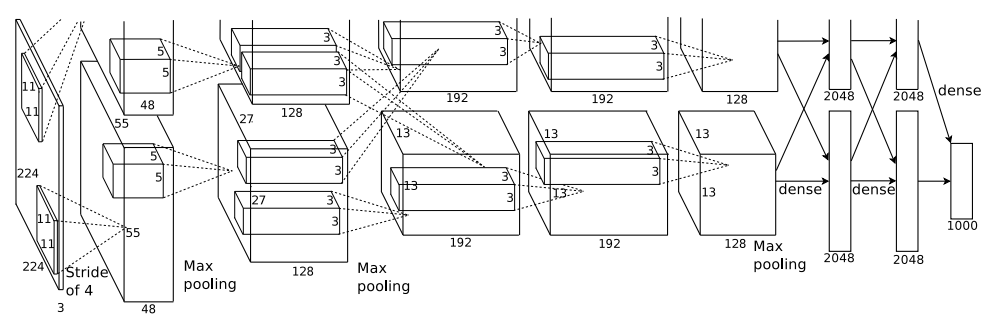

In [ ]:
"""
Previous values are overwritten by new values if inplace = True, which can save memories.
"""
class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 48, kernel_size=11, stride=4, padding=2),        # (224x224 -> 55x55)
            nn.ReLU(inplace=False),
            nn.MaxPool2d(kernel_size=3, stride=2),        # (55x55 -> 27x27)
            nn.Conv2d(48, 128, kernel_size=5, padding=2),       # (27x27 -> 27x27)
            nn.ReLU(inplace=False),
            nn.MaxPool2d(kernel_size=3, stride=2),        # (27x27 -> 13x13)
            nn.Conv2d(128, 192, kernel_size=3, padding=1),        # (13x13 -> 13x13)
            nn.ReLU(inplace=False),
            nn.Conv2d(192, 192, kernel_size=3, padding=1),        # (13x13 -> 13x13)
            nn.ReLU(inplace=False),
            nn.Conv2d(192, 128, kernel_size=3, padding=1),        # (13x13 -> 13x13)
            nn.ReLU(inplace=False),
            nn.MaxPool2d(kernel_size=3, stride=2)       # (13x13 -> 6x6)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(128 * 6 * 6, 2048),
            nn.ReLU(inplace=False),
            nn.Dropout(),
            nn.Linear(2048, 2048),
            nn.ReLU(inplace=False),
            nn.Linear(2048, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

model = AlexNet(num_classes=1000)

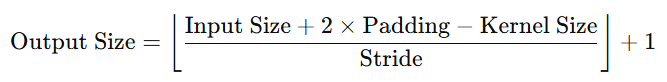

This equation, not mentioned in the paper, calculates output sizes of each convolutional layer.
- ⌊⋅⌋: floor operation that rounds down to the nearest integer (ignore remained parts)
- full size - kernel size: space that kernel can move
- / stride: steps that kernel can move

- +1: include the starting point, which means one step disappears if full size - kernel size

In [ ]:
import math

def conv2d_output_size(input_size, kernel_size, stride, padding):
    return math.floor((input_size + 2 * padding - kernel_size) / stride) + 1

input_size = 13
kernel_size = 3
stride = 2
padding = 0

output_size = conv2d_output_size(input_size, kernel_size, stride, padding)
print(output_size)

6


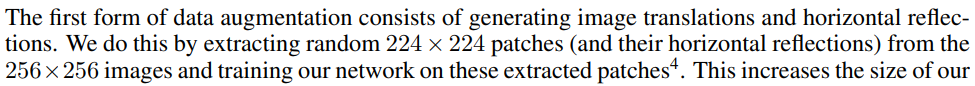

- Extract random 224x224 from original one 256x256 and flip horizontally.

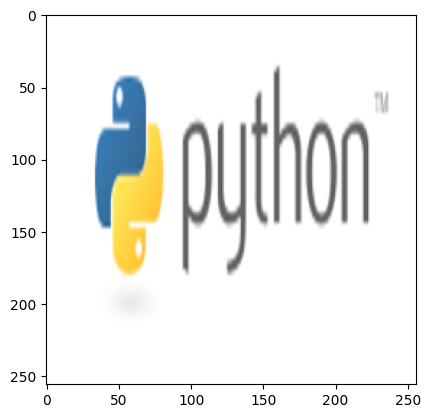

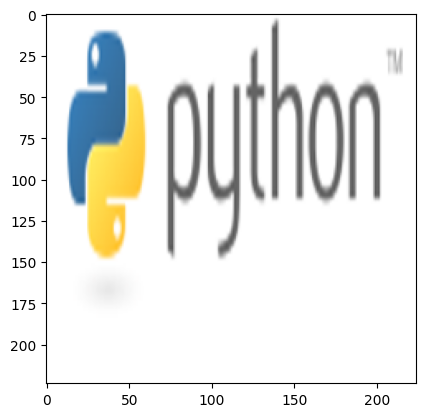

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

url = 'https://www.python.org/static/community_logos/python-logo.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content))       # BytesIO: save images in RAM
img_resized = img.resize((256, 256))

plt.imshow(img_resized)
plt.axis('on')
plt.show()

transform = transforms.Compose([
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),        # 50%
])

augmented_image = transform(img_resized)

plt.imshow(augmented_image)
plt.axis('on')
plt.show()

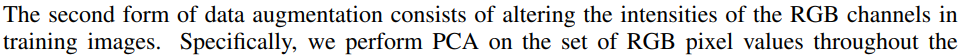

- Perform PCA and get some values to change RGB slightly from original one.

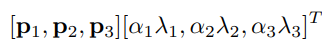

- p: eigenvector that calculates direction
- λ: eigenvalue that calculates how far it spreads
- α: random value

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 ...
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
(p₁, p₂, p₃):
[[ 0.6090188   0.5556204   0.56602305]
 [-0.5859324  -0.1658201   0.793213  ]
 [-0.53458333  0.8147329  -0.22456841]]
(λ₁, λ₂, λ₃):
[0.10051083 0.0145915  0.00025472]
(α₁, α₂, α₃):
[-0.14198664 -0.06827585 -0.10100112]
delta:
[-0.00809394 -0.00778513 -0.00886228]


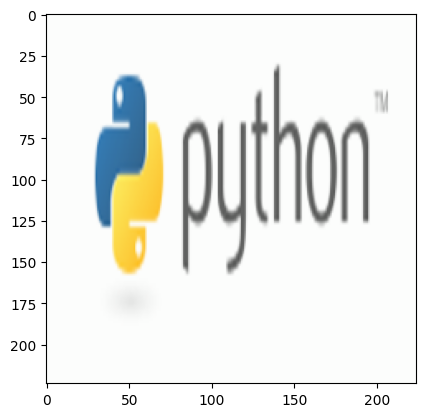

In [ ]:
"""
Augmented Image is almost similar with original one because PCA is not performed with various colorful images.
"""
import numpy as np
from sklearn.decomposition import PCA

url = 'https://www.python.org/static/community_logos/python-logo.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content))       # BytesIO: save images in RAM
img_resized = img.resize((256, 256))

transform = transforms.Compose([
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),        # 50%
])

augmented_images = []
for _ in range(10):
    augmented = transform(img_resized)
    augmented_images.append(augmented)

augmented_tensors = [transforms.ToTensor()(img) for img in augmented_images]        # transform to tensor and normalize to 0~1
# (10, 3, 224, 224)

# (10, 3, 224, 224) -> (10 * 224 * 224, 3)
data = torch.stack(augmented_tensors)       # add a dimension to put all image tensors together to do PCA all at once
data = data.permute(0, 2, 3, 1)       # (10, 224, 224, 3)
data = data.reshape(-1, 3)        # (10*224*224, 3)
data = data.numpy()       # sklearn only gets numpy values
print(data)       # [[R,G,B]]

pca = PCA(n_components=3)
pca.fit(data)

# p₁, p₂, p₃
p_vectors = pca.components_       # observe in x-axis, y-axis, z-axis
print("(p₁, p₂, p₃):")
print(p_vectors)

# λ₁, λ₂, λ₃
lambdas = pca.explained_variance_       # how far the data spread, meaning the importance of p₁, p₂, p₃
print("(λ₁, λ₂, λ₃):")
print(lambdas)

alphas = np.random.normal(0, 0.1, size=3)       # mean 0, standard deviation 0.1
print("(α₁, α₂, α₃):")
print(alphas)

delta = np.sum(p_vectors * (alphas * lambdas)[:, np.newaxis], axis=0)
print("delta:")
print(delta)

img_resized2 = img.resize((224, 224))
img_resized2_np = np.array(img_resized2).astype(np.float32) / 255.0       # pixel 0~1
augmented2_img = img_resized2_np + delta
augmented2_img = np.clip(augmented2_img, 0, 1)        # range 0~1; prevent negative or exceeded value

augmented2_image = Image.fromarray((augmented2_img * 255).astype(np.uint8))
plt.imshow(augmented2_image)
plt.axis('on')
plt.show()

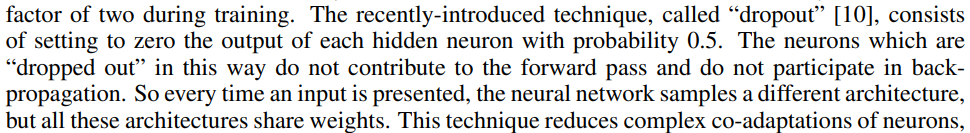

- Perform dropout to make some neurons inactive to be less adaptable to training data to prevent overfitting.

In [ ]:
"""
If p=0.5, multiply 2 so that average output can be adjusted when model.eval().
"""
dropout = nn.Dropout(p=0.5)
x = torch.randn(2, 5)
print(x)

output1 = dropout(x)
print(output1)

# manually
p = 0.5
mask = (torch.rand_like(x) > p).float()
output2 = mask * x / (1.0 - p)

print(mask)
print(output2)

tensor([[-0.2789,  1.5225, -0.2664, -1.0481, -0.3881],
        [ 0.3004, -0.3511, -0.4649,  0.1425,  0.1563]])
tensor([[-0.0000,  0.0000, -0.0000, -0.0000, -0.0000],
        [ 0.6008, -0.0000, -0.9298,  0.2850,  0.3126]])
tensor([[1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.]])
tensor([[-0.5577,  3.0451, -0.5327, -0.0000, -0.0000],
        [ 0.6008, -0.7022, -0.9298,  0.0000,  0.0000]])


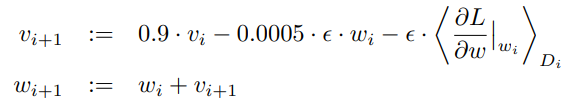

- $v_i$: momentum variable; previous update speed
- 0.9: momentum; how much previous update influence
- 0.0005: weight decay; give penalty to prevent overfitting
- $<∂L/∂w>_{D_i}$: average of gradients of each data in batch; towards loss function result 0

In [ ]:
import torch.optim as optim

model = nn.Linear(2, 1)

x = torch.randn(2, 2)
y = torch.randn(2, 1)

print("Input x:", x)
print("Target y:", y)

criterion = nn.MSELoss()

learning_rate = 0.01
momentum = 0.9
weight_decay = 0.0005
num_epochs = 10

# reset momentum variable
momentum_buffers = {}
for param in model.parameters():
    momentum_buffers[param] = torch.zeros_like(param.data)

for epoch in range(num_epochs):
    outputs = model(x)
    loss = criterion(outputs, y)
    loss.backward()

    # turn off autograd
    with torch.no_grad():
        for param in model.parameters():
            if param.grad is None:
                continue

            grad = param.grad
            weight_decay_term = weight_decay * learning_rate * param.data

            momentum_buffers[param] = momentum * momentum_buffers[param] - weight_decay_term - learning_rate * grad
            param.data += momentum_buffers[param]
            print(param.data)       # print weights and biases value

    # reset param.grad
    model.zero_grad()

    if (epoch + 1) % 1 == 0 or epoch == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')

Input x: tensor([[-2.1258, -0.5757],
        [ 0.9717,  1.1137]])
Target y: tensor([[1.0117],
        [0.3927]])
tensor([[-0.5450,  0.6358]])
tensor([0.6526])
Epoch [1/10], Loss: 0.201231
tensor([[-0.5353,  0.6313]])
tensor([0.6358])
Epoch [2/10], Loss: 0.190024
tensor([[-0.5222,  0.6248]])
tensor([0.6124])
Epoch [3/10], Loss: 0.170172
tensor([[-0.5069,  0.6164]])
tensor([0.5838])
Epoch [4/10], Loss: 0.144926
tensor([[-0.4906,  0.6062]])
tensor([0.5512])
Epoch [5/10], Loss: 0.117582
tensor([[-0.4745,  0.5945]])
tensor([0.5160])
Epoch [6/10], Loss: 0.090977
tensor([[-0.4595,  0.5813]])
tensor([0.4794])
Epoch [7/10], Loss: 0.067176
tensor([[-0.4464,  0.5668]])
tensor([0.4424])
Epoch [8/10], Loss: 0.047374
tensor([[-0.4359,  0.5513]])
tensor([0.4061])
Epoch [9/10], Loss: 0.031974
tensor([[-0.4284,  0.5351]])
tensor([0.3714])
Epoch [10/10], Loss: 0.020786
